In [1]:
# pip install jsonlines

In [2]:
# imports
# from openai import OpenAI
import statistics
import pandas as pd
import json
import jsonlines

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import wrap
from ctypes import alignment
import numpy as np

In [3]:
my_pal = {"conservative": "#ff6161", "liberal": "#6171ff", 'non-aligned':"#ffb347", 'moderate':"#ffb347"}


# graphs n stuff

In [4]:
import random

# questions = pd.read_csv('../questions.csv')

# my_pal = {"conservative": "#ff6161", "liberal": "#6171ff", 'non-aligned':"#ffb347", 'moderate':"#ffb347"}
# results_base = pd.read_csv('../results/base_alignments_04_03_2025__04_29_25.csv')
# print(results_base.head())
# results_base = results_base[results_base['origin'] == 'graham']
# results_base.rename(columns={'alignment':'prompt_number', 'prompt_number':'alignment'}, inplace=True)
# print(results_base['alignment'].unique())

# results_vicuna = pd.read_csv('../results/profile_question_responses-positive_and_inverse.csv')
# category_mapping = {}
# for _, row in questions.iterrows():
#     category_mapping[row['positive']] = row['Category']
# for _, row in questions.iterrows():
#     category_mapping[row['inverse']] = row['Category']
# results_vicuna['category'] = results_vicuna['question'].map(category_mapping)
# results_vicuna.rename(columns={'response-integer':'response', 'system_prompt':'alignment'}, inplace=True)

# results_v_extra = pd.read_csv('../results/vicuna_extra.csv')
# results_v_extra['source'] = results_v_extra['source'].map(lambda x : x if x == 'inherent' else 'explicit')

# results_persona = pd.read_csv('../results/results_raw04_03_2025.csv')
# results_persona = results_persona[results_persona['origin'] == 'graham']
# #results_persona = results_persona[results_persona['trait_inclusion'] == 'Include almost all/all traits']

# results_non_aligned = pd.read_csv('../results/no_ideology_04_04_2025__12_16_38.csv')
# #results_non_aligned.rename(columns={'alignment':'prompt_number', 'prompt_number':'alignment'}, inplace=True)
# results_non_aligned['alignment'] = ['non-aligned'] * results_non_aligned.shape[0]

# simple_base = results_base[['response', 'category', 'alignment']]
# simple_base['source'] = 'explicit'
# simple_base['model'] = 'gpt'

# simple_persona = results_persona[['response', 'category', 'alignment']]
# simple_persona['source'] = 'persona'
# simple_persona['model'] = 'gpt'

# simple_non_aligned = results_non_aligned[['response', 'category', 'alignment']]
# simple_non_aligned['source'] = 'inherent'
# simple_non_aligned['model'] = 'gpt'

# simple_human = pd.read_csv('../results/graham_human.csv')
# simple_human['model'] = 'homo sapiens neurons'

# simple_vicuna = results_vicuna[results_vicuna['question.1'] != 'inverse'][['response', 'category', 'alignment']]
# simple_vicuna['source'] = 'persona'
# simple_vicuna['model'] = 'vicuna'

# simple_v_extra = results_v_extra[results_v_extra['Format'] != 'inverse'][['response', 'category', 'alignment', 'source']]
# simple_v_extra['model'] = 'vicuna'
# simple_v_extra['alignment'] = simple_v_extra['alignment'].map(lambda x: {'inherent':'non-aligned'}.get(x, x))

# simple_combined = pd.concat([simple_non_aligned, simple_base, simple_persona, simple_human[simple_human['alignment'] != 'moderate'], simple_vicuna, simple_v_extra])

# simple_combined.shape
# simple_combined['category'] = simple_combined['category'].map(lambda s: s.lower())

# simple_combined_noisy = simple_combined.copy(deep=True)
# simple_combined_noisy['response'] = simple_combined['response'].apply(lambda x : x + random.uniform(-.2, .2) )
# print(simple_combined['category'].unique())
# results_vicuna


In [5]:
gender_dict = {'mai':'F','sarah':'F','james':'M','diana':'F','angela':'F','riley':'F','zoe':'F','lucy':'F','david':'M','marcus':'M','ethan':'M','noah':'M','dr.':'F','alex':'M',
               'william':'M','carlos':'M','john':'M','robert':'M','ray':'M','thomas':'M','luis':'M','peter':'M','brenda':'F','maria':'F','ruth':'F','barbara':'F','jake':'M'}

def extract_name(prompt):
    return prompt.split()[2].lower()

# gendered_data = results_persona.copy(deep=True)
# gendered_data['gender'] = gendered_data['persona'].apply(lambda x : gender_dict[extract_name(x)])
# gendered_data = gendered_data[['response','alignment','nickname','category','origin','gender']]
# gendered_data = gendered_data[gendered_data['category'] == 'Harm']

# plt.figure(figsize=(16, 16))
# sns.boxplot(gendered_data, x='gender', y='response', hue='alignment', palette=my_pal)


In [6]:
def single_pillar_boxplot(df, ax=None, title="", show_legend=False):

    if ax is None:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 15))

    sns.boxplot(data=df, x="source", y="response", hue='alignment', palette=my_pal, whis=(0, 95), ax=ax)

    if not show_legend:
        ax.get_legend().remove()

    ax.set_xlabel('')
    ax.set_title(title)
    return ax

In [8]:
ds_p_1 = pd.read_csv(r"C:\Users\llste\Desktop\LLM-Ethics-1\lorraine_paper2\results\processed\deepseek\deepseekchat_personas_temp1_results_all_PROCESSED.csv")
ds_p_1["source"] = "persona"
ds_p_1["response_processed"] = np.nan

ds_p_15 = pd.read_csv(r"C:\Users\llste\Desktop\LLM-Ethics-1\lorraine_paper2\results\processed\deepseek\deepseekchat_personas_temp1.5_results_all_PROCESSED.csv")
ds_p_15["source"] = "persona"

ds_e_1 = pd.read_csv(r"C:\Users\llste\Desktop\LLM-Ethics-1\lorraine_paper2\results\processed\deepseek\deepseekchat_base_temp1_results_all_PROCESSED.csv")
ds_e_1["source"] = "explicit"
ds_e_1["response_processed"] = np.nan
# ds_e_1["alignment"] = "base"

ds_e_15 = pd.read_csv(r"C:\Users\llste\Desktop\LLM-Ethics-1\lorraine_paper2\results\processed\deepseek\deepseekchat_base_temp1.5_results_all_PROCESSED.csv")
ds_e_15["source"] = "explicit"
ds_e_15["response_processed"] = np.nan
# ds_e_15["alignment"] = "base"

ds_i_1 = pd.read_csv(r"C:\Users\llste\Desktop\LLM-Ethics-1\lorraine_paper2\results\processed\deepseek\deepseekchat_unaligned_temp1_results_all_PROCESSED.csv")
ds_i_1["source"] = "inherent"
ds_i_1["response_processed"] = np.nan
ds_i_1["alignment"] = "unaligned"

ds_i_15 = pd.read_csv(r"C:\Users\llste\Desktop\LLM-Ethics-1\lorraine_paper2\results\processed\deepseek\deepseekchat_unaligned_temp1.5_results_all_PROCESSED.csv")
ds_i_15["source"] = "inherent"
ds_i_15["response_processed"] = np.nan
ds_i_15["alignment"] = "unaligned"

In [9]:
ds_all = pd.concat([ds_p_1, ds_p_15, ds_e_1, ds_e_15, ds_i_1, ds_i_15], ignore_index=True, join="inner")
ds_all = ds_all.drop(["Unnamed: 0"], axis=1)

In [10]:
ds_all = ds_all.loc[ds_all['origin'] == 'graham']
ds_all = ds_all.reset_index(drop=True)

In [11]:
ds_all["response_adjusted"] = ds_all["response_adjusted"] + 1
ds_all["source"] = ds_all["source"].str.title()
ds_all["alignment"] = ds_all["alignment"].str.title()

In [12]:
display(ds_all)

,response,response_adjusted,prompt,alignment,prompt_number,category,origin,model,temperature,trial,source,response_processed
0,2,3,If I knew that my brother had committed a murd...,Liberal,1.1,ingroup,graham,deepseek-chat,1.0,A,Persona,NaN
1,2,3,When it comes to close friendships and romanti...,Liberal,1.2,ingroup,graham,deepseek-chat,1.0,A,Persona,NaN
2,2,3,Loyalty to oneâ€™s group is more important tha...,Liberal,1.3,ingroup,graham,deepseek-chat,1.0,A,Persona,NaN
3,3,4,The government should strive to improve the we...,Liberal,1.4,ingroup,graham,deepseek-chat,1.0,A,Persona,NaN
4,4,5,If a friend wanted to cut in with me on a long...,Liberal,2.1,fairness,graham,deepseek-chat,1.0,A,Persona,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
18595,4,5,"When the government makes laws, those laws sho...",Unaligned,4.4,authority,graham,deepseek-chat,1.5,15,Inherent,NaN
18596,4,5,"If I saw a mother slapping her child, I would ...",Unaligned,5.1,harm,graham,deepseek-chat,1.5,15,Inherent,NaN
18597,3,4,It can never be right to kill a human being.,Unaligned,5.2,harm,graham,deepseek-chat,1.5,15,Inherent,NaN
18598,5,6,Compassion for those who are suffering is the ...,Unaligned,5.3,harm,graham,deepseek-chat,1.5,15,Inherent,NaN


In [13]:
def single_pillar_boxplot(df, ax=None, title="", show_legend=False):
    sns.set_theme(font_scale=3)

    if ax is None:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 15))

    sns.boxplot(data=df, x="source", y="response_adjusted", hue='alignment', palette=my_pal, whis=(0, 95), ax=ax)

    if not show_legend:
        ax.get_legend().remove()
        
	# ax.refline(x = 20,
    #       color = "blue",
    #       lw = 3)

    ax.set_xlabel('')
    ax.set_ylabel('Response', fontsize=35)
    ax.set_title(title.title(),fontsize=50)
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.tick_params(axis='x', which='minor', labelsize=30)
    # ax.fontsize=50
    return ax

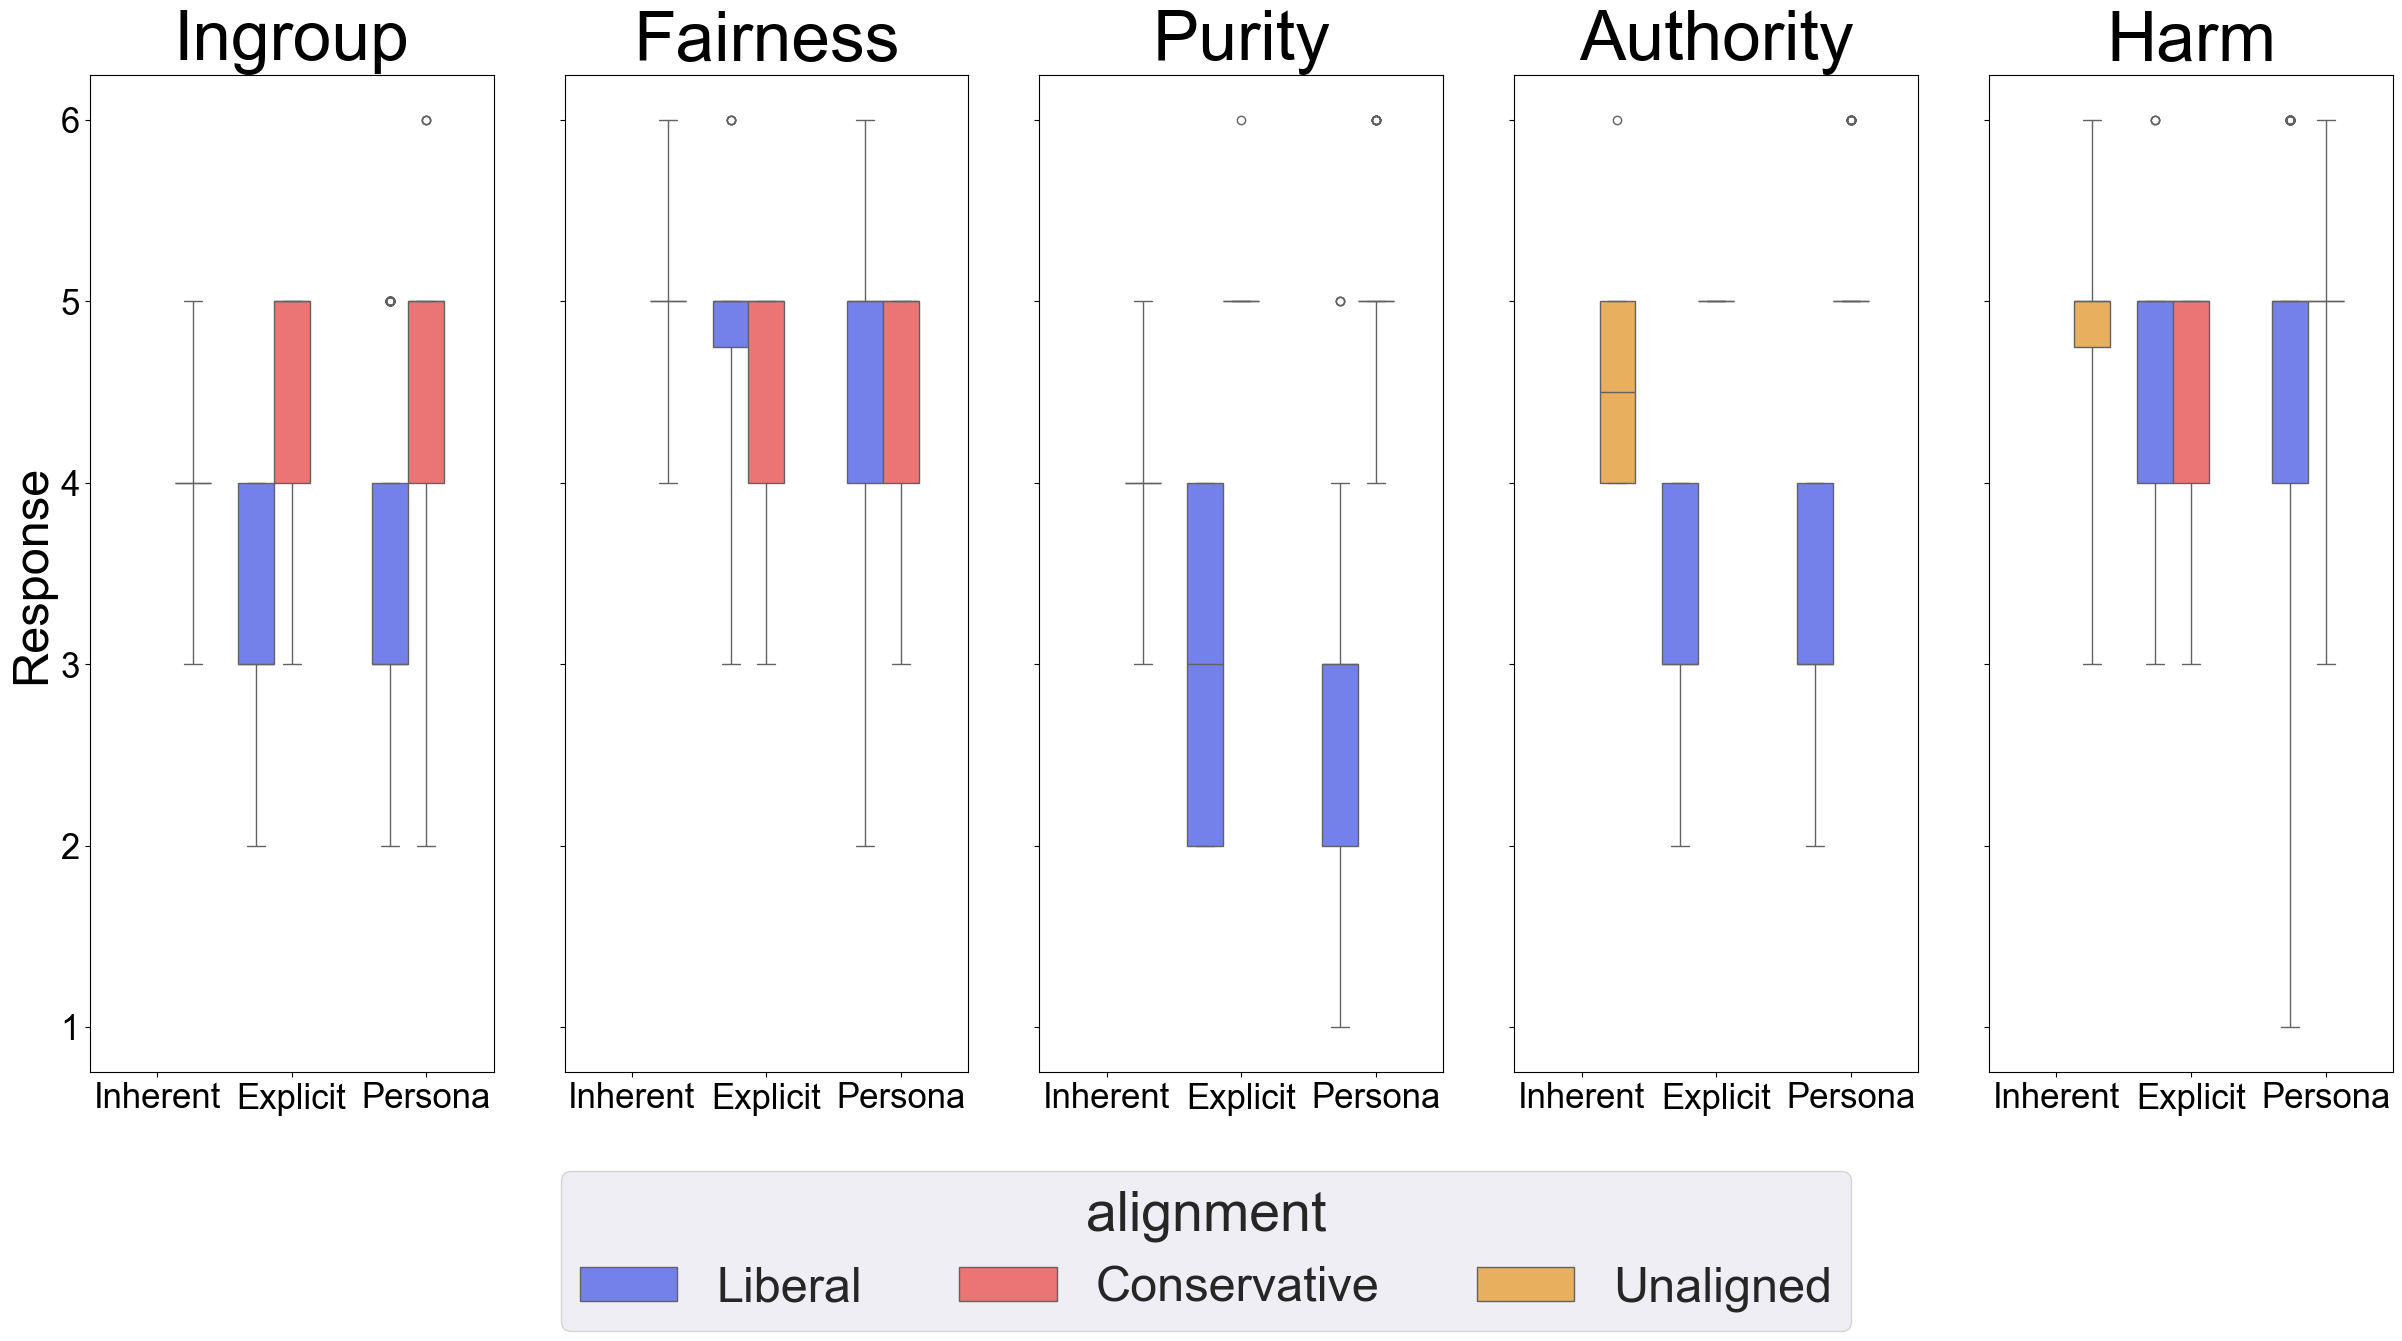

In [14]:
my_pal = {"Conservative": "#ff6161", "Liberal": "#6171ff", 'Unaligned':"#ffb347"}

def graph_all(df):
    # cats = df['category'].unique()
    # df = df[df['model'] == model]
    cats = ['ingroup', 'fairness', 'purity', 'authority', 'harm']
    # alignments = df['alignment'].unique()
    # sources = df['source'].unique()
    df['source'] = pd.Categorical(df['source'], categories=['Inherent', 'Explicit', 'Persona'], ordered=True)

    fig, axes = plt.subplots(1, len(cats), figsize=(5*len(cats), 15), sharey=True)

    for i, (cat, ax) in enumerate(zip(cats, axes)):
        # Only show y-label on first plot
        if i > 0:
            ax.set_ylabel('')

        df_filtered = df[df['category'] == cat]
        ax = single_pillar_boxplot(df_filtered, ax,  cat, cat == 'ingroup')

        if i == 0:
            f_legend = ax.legend_
            ax.get_legend().remove()
        
    
    fig.legend(f_legend.legend_handles, [t.get_text() for t in f_legend.texts], 
          title=f_legend.get_title().get_text(),
          title_fontsize=40,
          fontsize=35,
          loc='upper center', 
          bbox_to_anchor=(0.5, 0.15),  # Centered at bottom of figure
          ncol=3)  # Display all alignment categories in one row

    # Add a common x-label for all subplots
    # fig.text(0.5, 0.105, 'source', ha='center', fontsize=15)
    fig.suptitle("")
    
    # Adjust layout - leave space at bottom for common x-label and legend
    fig.tight_layout(rect=[0, 0.135, 1, 0.98])

graph_all(ds_all)

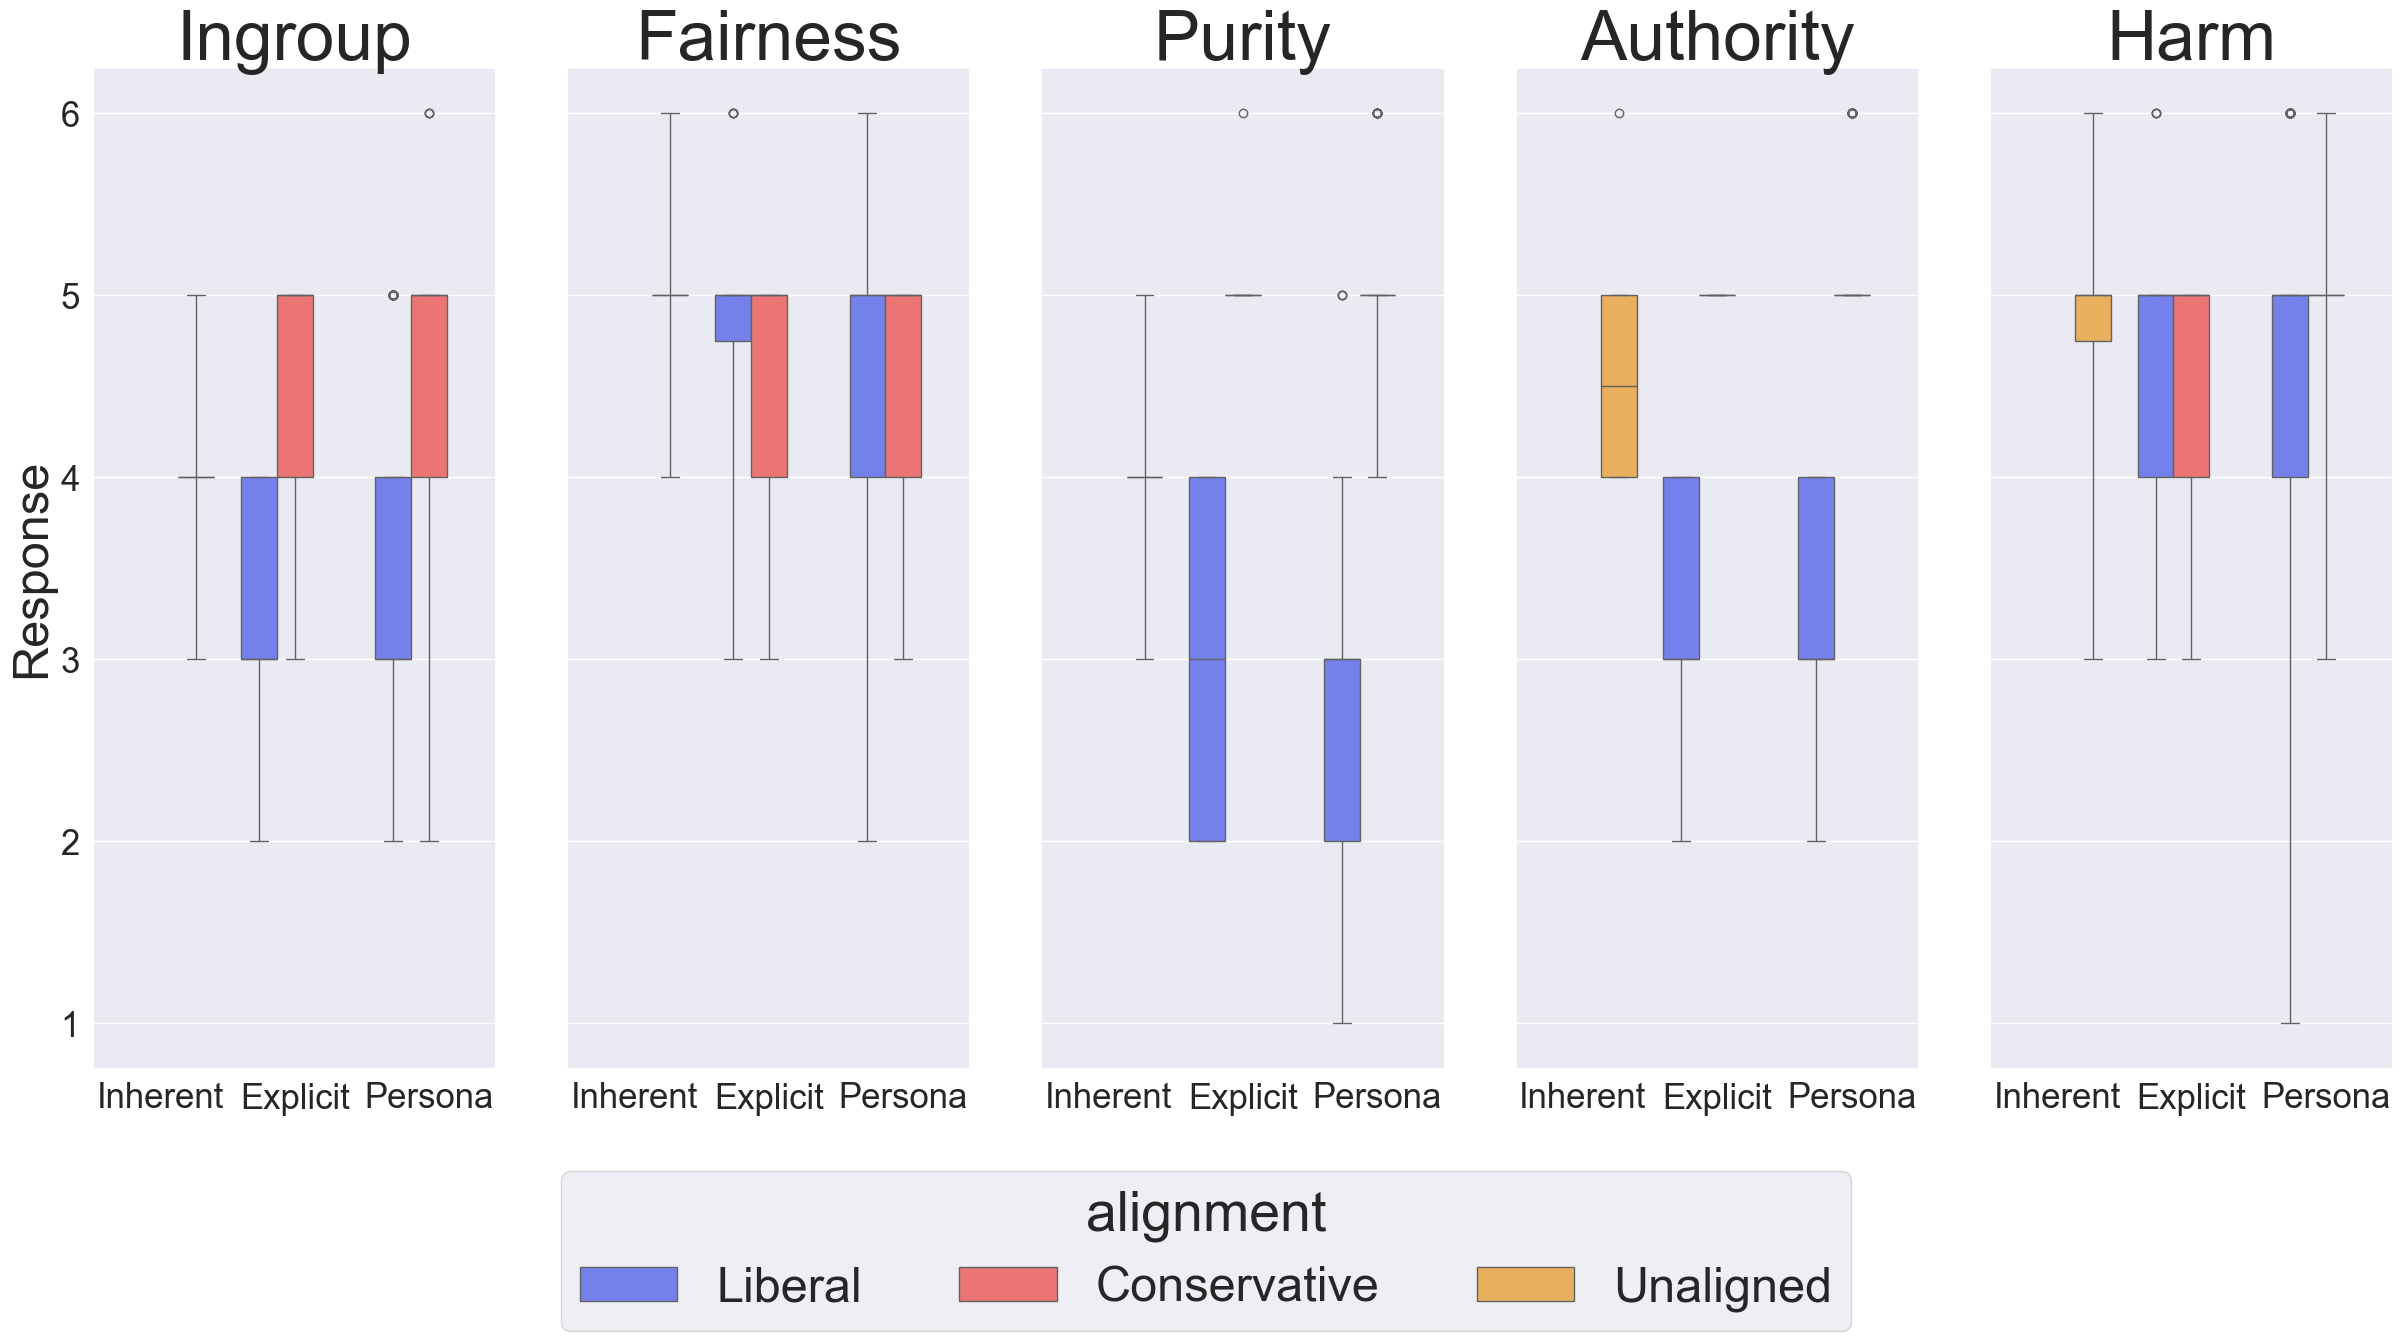

In [15]:
graph_all(ds_all)

In [16]:
graph_all(simple_combined, 'vicuna')

NameError: name 'simple_combined' is not defined